In [78]:
import numpy as np
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt#visualization
import seaborn as sns#visualization
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('D:/Ballebazi/User_Contest_Info123.csv')

In [80]:
df.head()

,user_id,cash_applied,bonus_applied,credits_won,date_added
0,1761072,0.0,0.0,0.0,21-12-2019 14:22
1,1761072,0.0,0.0,0.0,21-12-2019 14:22
2,1567059,29.0,0.0,0.0,21-12-2019 14:22
3,1761072,0.0,0.0,0.0,21-12-2019 14:22
4,2439797,49.0,0.0,0.0,21-12-2019 14:21


In [81]:
df.isnull().sum()

user_id          0
cash_applied     0
bonus_applied    0
credits_won      0
date_added       0
dtype: int64

In [82]:
df1 = df.drop(['date_added','user_id'], axis=1)

In [83]:
df1.head()

,cash_applied,bonus_applied,credits_won
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,29.0,0.0,0.0
3,0.0,0.0,0.0
4,49.0,0.0,0.0


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [85]:
names = df1.columns

In [86]:
scaler = preprocessing.StandardScaler()

In [87]:
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns = names)

In [88]:
scaled_df

,cash_applied,bonus_applied,credits_won
0,-0.138084,-0.232153,-0.082065
1,-0.138084,-0.232153,-0.082065
2,0.031383,-0.232153,-0.082065
3,-0.138084,-0.232153,-0.082065
4,0.148257,-0.232153,-0.082065
5,0.148257,-0.232153,-0.082065
6,0.148257,-0.232153,-0.082065
7,-0.138084,-0.232153,-0.082065
8,-0.108865,-0.232153,-0.082065
9,-0.097178,-0.232153,-0.082065


In [89]:
#creating clusters
from  sklearn.cluster import KMeans

In [90]:
ks = range(1,10)

In [91]:
inertias = []

In [92]:
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    #Fit model to samples
    model.fit(scaled_df)
    
    #Append the inertia to the list of inertias
    inertias.append(model.inertia_)

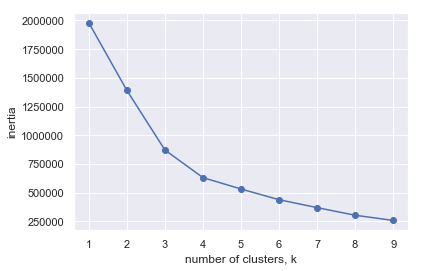

In [93]:
import matplotlib.pyplot as plt
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [94]:
model = KMeans(n_clusters = 3)
labels = model.fit_predict(scaled_df)
scaled_df['label'] = labels
scaled_df.label.value_counts()

0    640144
1     18339
2      1612
Name: label, dtype: int64

In [95]:
#Grouping the data on label
grouped_Data = scaled_df.groupby('label')
Label_0 = grouped_Data.get_group(0)
Label_1 = grouped_Data.get_group(1)
Label_2 = grouped_Data.get_group(2)

In [96]:
Label_0.head()

,cash_applied,bonus_applied,credits_won,label
0,-0.138084,-0.232153,-0.082065,0
1,-0.138084,-0.232153,-0.082065,0
2,0.031383,-0.232153,-0.082065,0
3,-0.138084,-0.232153,-0.082065,0
4,0.148257,-0.232153,-0.082065,0


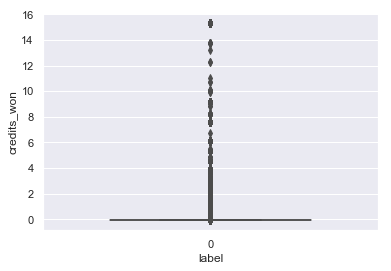

In [97]:
sns.boxplot(x= Label_0['label'],y= Label_0['credits_won'],data= Label_0,orient='v',width=.6)
sns.set(rc={'figure.figsize':(8,4)})

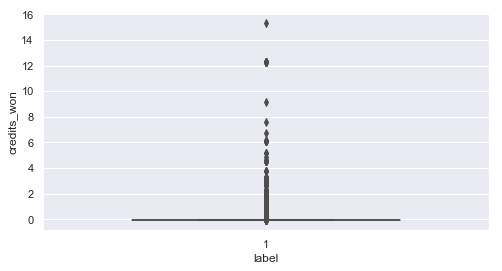

In [98]:
sns.boxplot(x= Label_1['label'],y= Label_1['credits_won'],data= Label_1,orient='v',width=.6)
sns.set(rc={'figure.figsize':(8,4)})

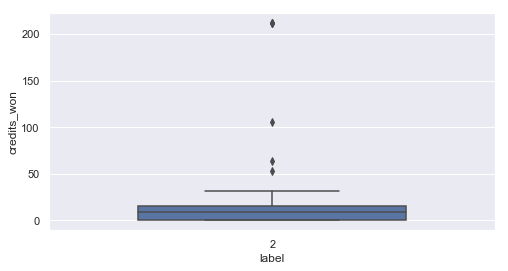

In [99]:
sns.boxplot(x= Label_2['label'],y= Label_2['credits_won'],data= Label_2,orient='v',width=.6)
sns.set(rc={'figure.figsize':(8,4)})

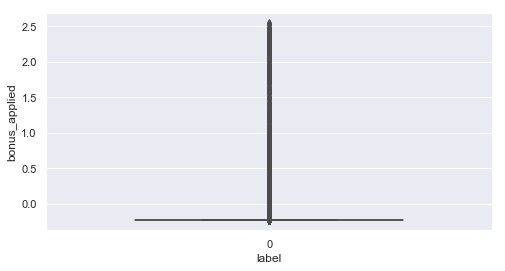

In [100]:
sns.boxplot(x= Label_0['label'],y= Label_0['bonus_applied'],data= Label_0,orient='v',width=.6)
sns.set(rc={'figure.figsize':(8,4)})

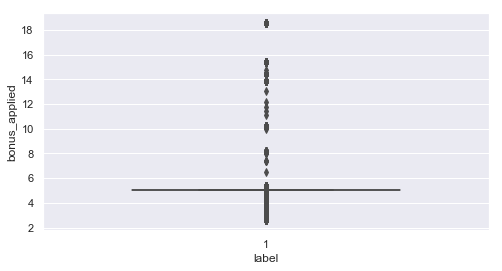

In [101]:
sns.boxplot(x= Label_1['label'],y= Label_1['bonus_applied'],data= Label_1,orient='v',width=.6)
sns.set(rc={'figure.figsize':(8,4)})

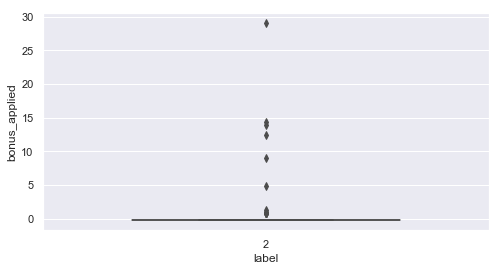

In [102]:
sns.boxplot(x= Label_2['label'],y= Label_2['bonus_applied'],data= Label_2,orient='v',width=.6)
sns.set(rc={'figure.figsize':(8,4)})

In [103]:
df.head()

,user_id,cash_applied,bonus_applied,credits_won,date_added
0,1761072,0.0,0.0,0.0,21-12-2019 14:22
1,1761072,0.0,0.0,0.0,21-12-2019 14:22
2,1567059,29.0,0.0,0.0,21-12-2019 14:22
3,1761072,0.0,0.0,0.0,21-12-2019 14:22
4,2439797,49.0,0.0,0.0,21-12-2019 14:21


In [104]:
df['date_added'] = pd.to_datetime(df.date_added)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "pandas/_libs/tslib.pyx", line 586, in pandas._libs.tslib.array_to_datetime
  File "pandas/_libs/tslibs/np_datetime.pyx", line 184, in pandas._libs.tslibs.np_datetime._string_to_dts
ValueError: Error parsing datetime string "11-12-2019 04:33" at position 2

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-104-7da1137ef6f3>", line 1, in <module>
    df['date_added'] = pd.to_datetime(df.date_added)
  File "D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py", line 592, in to_datetime
    values = convert_listlike(arg._values, True, format)
  File "D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py", line 302, in _convert_listlike_datetimes
    allow_object=True)
  File "D:\Anaconda3\lib\site-packages\

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "pandas/_libs/tslib.pyx", line 586, in pandas._libs.tslib.array_to_datetime
  File "pandas/_libs/tslibs/np_datetime.pyx", line 184, in pandas._libs.tslibs.np_datetime._string_to_dts
ValueError: Error parsing datetime string "11-12-2019 04:33" at position 2

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-104-7da1137ef6f3>", line 1, in <module>
    df['date_added'] = pd.to_datetime(df.date_added)
  File "D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py", line 592, in to_datetime
    values = convert_listlike(arg._values, True, format)
  File "D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py", line 302, in _convert_listlike_datetimes
    allow_object=True)
  File "D:\Anaconda3\lib\site-packages\

TypeError: can only concatenate str (not "list") to str

In [28]:
df.dtypes

user_id                   int64
cash_applied            float64
bonus_applied           float64
credits_won             float64
date_added       datetime64[ns]
dtype: object

In [31]:
df.date_added.min()

Timestamp('2019-01-12 01:31:00')

In [32]:
df.date_added.max()

Timestamp('2019-12-21 14:22:00')

In [34]:
df.date_added.max() - df.date_added.min()

Timedelta('343 days 12:51:00')

In [36]:
df['day'] = df.date_added.dt.day

In [37]:
df['month'] = df.date_added.dt.month

In [38]:
df['year'] = df.date_added.dt.year

In [39]:
df.head()

,user_id,cash_applied,bonus_applied,credits_won,date_added,day,month,year
0,1761072,0.0,0.0,0.0,2019-12-21 14:22:00,21,12,2019
1,1761072,0.0,0.0,0.0,2019-12-21 14:22:00,21,12,2019
2,1567059,29.0,0.0,0.0,2019-12-21 14:22:00,21,12,2019
3,1761072,0.0,0.0,0.0,2019-12-21 14:22:00,21,12,2019
4,2439797,49.0,0.0,0.0,2019-12-21 14:21:00,21,12,2019


In [41]:
#counting the perticular date occurences in dataset
df.day.value_counts().sort_index()

8       3177
9       2259
10     13050
12    258073
13     41997
14     38335
15     37245
16     32536
17     40859
18     47611
19     40611
20     41700
21     39512
23         4
24        94
25       752
26      9625
27      2955
28      3004
29      5610
30       147
31       939
Name: day, dtype: int64

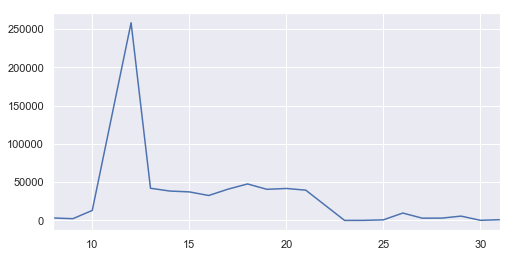

In [43]:
#plotting the perticular date occurences in dataset 
df.day.value_counts().sort_index().plot()

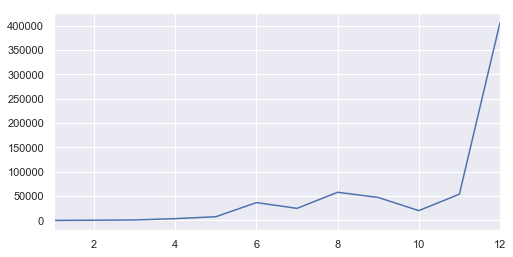

In [44]:
#plotting the perticular date occurences in dataset 
df.month.value_counts().sort_index().plot()

In [55]:
df2 = df[['day','month','year','cash_applied','user_id','bonus_applied','credits_won']]

In [56]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
df2.set_index(df.date_added, inplace=True)

In [57]:
cash_applied = df2['cash_applied']

Text(0,0.5,'Cash Applied')

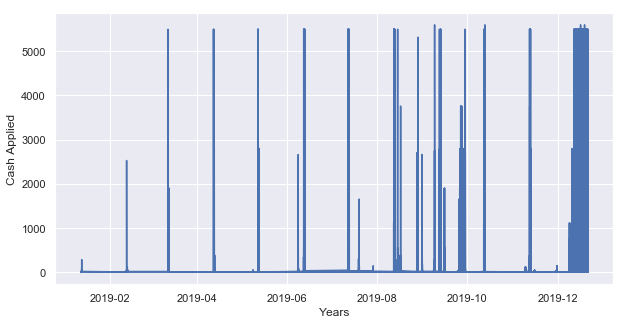

In [58]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(cash_applied)
plt.xlabel('Years')
plt.ylabel('Cash Applied')

In [59]:
active = df2['user_id']

In [60]:
active.head()

date_added
2019-12-21 14:22:00    1761072
2019-12-21 14:22:00    1761072
2019-12-21 14:22:00    1567059
2019-12-21 14:22:00    1761072
2019-12-21 14:21:00    2439797
Name: user_id, dtype: int64

Text(0,0.5,'user id')

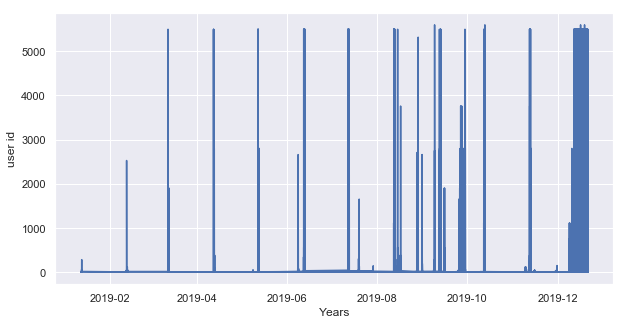

In [61]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(dis_charge)
plt.xlabel('Years')
plt.ylabel('user id')

In [62]:
bonus = df2['bonus_applied']

Text(0,0.5,'Bonus Applied')

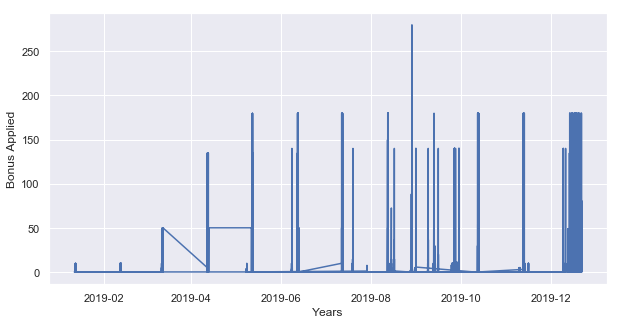

In [63]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(bonus)
plt.xlabel('Years')
plt.ylabel('Bonus Applied')

In [64]:
credits = df2['credits_won']

Text(0,0.5,'Credits Won')

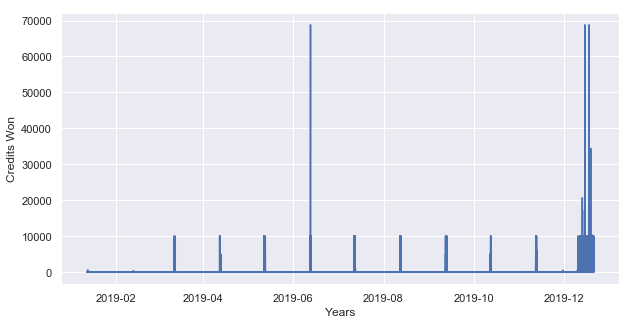

In [65]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(credits)
plt.xlabel('Years')
plt.ylabel('Credits Won')

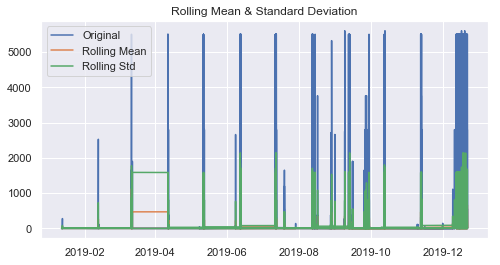

In [66]:
#Determing rolling statistics
rolmean = cash_applied.rolling(window=12).mean()
rolstd = cash_applied.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(cash_applied, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [67]:
cash_applied_by_month = pd.pivot_table(df2, values = "cash_applied", columns = "month", index = "day")

In [68]:
cash_applied_by_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,2.361832,11.288978,NaN,0.666667,22.605594,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.916667,7.937241,13.082350
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.340264
12,7.665972,16.516094,62.697801,29.901713,29.809750,23.890590,38.160692,22.933114,23.820217,16.500653,17.248107,25.722575
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.545455,0.000000,NaN,NaN,28.967077


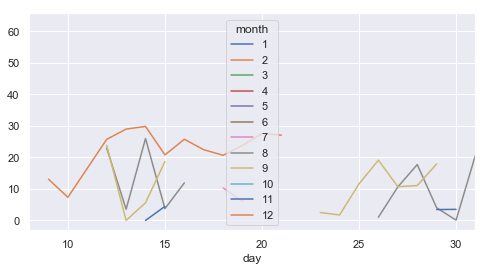

In [69]:
#Discharge rate based on month 1,2,3 and 4 refers to Jan,Feb,March and April
cash_applied_by_month.plot()

In [70]:
credits_won_by_month = pd.pivot_table(df2, values = "credits_won", columns = "month", index = "day")

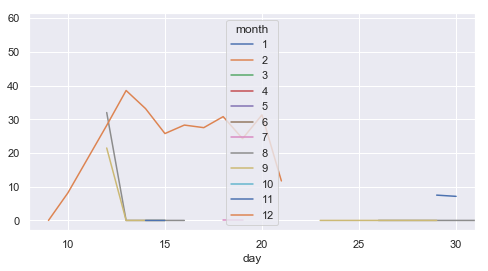

In [71]:
credits_won_by_month.plot()

In [72]:
df2.head()

,day,month,year,cash_applied,user_id,bonus_applied,credits_won
date_added,,,,,,,
2019-12-21 14:22:00,21,12,2019,0.0,1761072,0.0,0.0
2019-12-21 14:22:00,21,12,2019,0.0,1761072,0.0,0.0
2019-12-21 14:22:00,21,12,2019,29.0,1567059,0.0,0.0
2019-12-21 14:22:00,21,12,2019,0.0,1761072,0.0,0.0
2019-12-21 14:21:00,21,12,2019,49.0,2439797,0.0,0.0


In [77]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df2, model='multiplicative')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

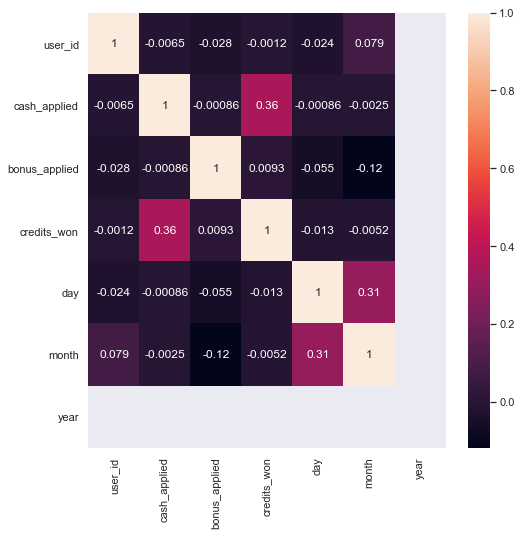

In [76]:
#Correlation plot
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True)